<a href="https://colab.research.google.com/github/LucasWerppFranco/CP-1---Energias-Renovaveis/blob/main/Exerc%C3%ADcios/1CCPF_CP1_SERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importando Bibliotecas**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import datasets
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor






**Criando Dataset c/ base no arquivo .txt externo**

In [8]:
df = pd.read_csv('/content/household_power_consumption.txt',
                 sep=';',
                 na_values='?')

FileNotFoundError: [Errno 2] No such file or directory: '/content/household_power_consumption.txt'

**Análise Exploratória**

In [ ]:
df.head(11)

**Analisando Características do Dataset**

In [ ]:
# Categorias da Tabela
df.columns

In [ ]:
# Tamanho do Dataset
df.shape
print(f"O Data frame possuí {df.shape[0]} linhas e {df.shape[1]} colunas")

In [ ]:
# Características dos Atributos
df.info()

In [ ]:
# Descrição Estátistica das Colunas
df.describe()

**Formatando Dataset**

In [ ]:
# Converter as colunas numéricas que estão como object
cols_to_convert = ['Global_active_power', 'Global_reactive_power',
                   'Voltage', 'Global_intensity',
                   'Sub_metering_1', 'Sub_metering_2']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

**Exercícios Checkpoint**

**PARTE 1 – Exercícios iniciais com Individual Household Electric Power Consumption**

Ex. 1: Carregue o dataset e exiba as 10 primeiras linhas.

In [ ]:
df.head(11)

Ex. 2: Diferença entre as variáveis GAP e GRP

Global Active Power x Global Reactive Power.

A principal diferença entre potência ativa e reativa reside no fato de que a **potência ativa (P)** é a potência que realiza trabalho útil, convertendo energia elétrica em outras formas, como mecânica, térmica ou luminosa, enquanto a **potência reativa (Q)** é a potência necessária para manter campos eletromagnéticos em dispositivos como motores e transformadores, mas não realiza trabalho útil diretamente

Ex. 3: Verifique se existem valores ausentes no dataset. Quantifique-os.

In [ ]:
missing_values = df.isnull().sum()
print("Valores ausentes por coluna:")
print(missing_values)

Ex. 4: Converta a coluna "Date" para o tipo "datetime" e crie uma nova coluna com o dia da semana correspondente.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Day of Week'] = df['Date'].dt.day_name()
display(df.head())

*Ex*. 5: Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de "Global_active_power".

In [ ]:
# Garantir conversão da coluna Date
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Converter Global_active_power para numérico
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

# Filtrar registros de 2007
df_2007 = df[df['Date'].dt.year == 2007]

# Calcular média diária
daily_mean_2007 = df_2007.groupby('Date')['Global_active_power'].mean()

print("Média diária de Global_active_power em 2007 (primeiros 5 dias):")
print(daily_mean_2007.head())


Ex. 6: Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua
escolha.

In [ ]:
date_to_plot = df['Date'].iloc[0]

df_single_day = df[df['Date'] == date_to_plot].copy()

df_single_day['datetime'] = pd.to_datetime(df_single_day['Date'].astype(str) + ' ' + df_single_day['Time'], format='%Y-%m-%d %H:%M:%S')


df_single_day.set_index('datetime', inplace=True)

df_single_day['Global_active_power'] = pd.to_numeric(df_single_day['Global_active_power'], errors='coerce')
df_single_day.dropna(subset=['Global_active_power'], inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(x=df_single_day.index, y='Global_active_power', data=df_single_day)
plt.title(f'Energia ativa global em {date_to_plot.strftime("%d/%m/%Y")}')
plt.xlabel('Tempo')
plt.ylabel('Energia ativa global (kilowatts)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Ex. 7: Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?


In [ ]:
df["Voltage"].hist()

Ex. 8: Calcule o consumo médio por mês em todo o período disponível no dataset.


In [ ]:
media=df["Global_active_power"].mean()
print(f"O consumo medio por mes é de {media:.2f} ")

Ex. 9:  Identifique o dia com maior consumo de energia ativa global (Global_active_power).


In [ ]:
consumo_diario = df.groupby('Date')['Global_active_power'].sum()

dia_maior_consumo = consumo_diario.idxmax()
valor_maior_consumo = consumo_diario.max()

print(f"O dia com maior consumo de energia ativa global é {dia_maior_consumo} com um total de {valor_maior_consumo} kW.")

Ex. 10: Compare o consumo médio de energia ativa global em dias de semana versus finais de semana.


In [ ]:
df['Day_of_week'] = df['Date'].dt.dayofweek

df['Day_type'] = df['Day_of_week'].apply(lambda x: 'dias da semana' if x < 5 else 'finais de semana')

average_consumption_by_day_type = df.groupby('Day_type')['Global_active_power'].mean()

print("Consumo médio de energia ativa global:")
print(average_consumption_by_day_type)

Ex. 11: Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power, Voltage e Global_intensity.

In [ ]:
# Lista de colunas
Global_colunas = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

# Seleciona as colunas e calcula a correlação
correlacao = df[Global_colunas].corr()
print('a correlação das variáveis é: ')
print(correlacao)


Ex. 12: Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1, Sub_metering_2 e Sub_metering_3.

In [ ]:
# Criando a variável Total_Sub_metering:
Total_Sub_metering = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
print('A soma da nova variável é de: ')
print(Total_Sub_metering)

Ex. 13: Verifique se há algum mês em que o Total_Sub_metering ultrapassa a média de Global_active_power.

In [ ]:
df['Month'] = df['Date'].dt.to_period('M')

#Criando a coluna Total_Sub_metering
df['Total_Sub_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']

monthly_sub_metering = df.groupby('Month')['Total_Sub_metering'].sum()
monthly_global_active_power = df.groupby('Month')['Global_active_power'].mean()

comparacao = monthly_sub_metering > monthly_global_active_power

print("Meses onde Total_Sub_metering ultrapassa a média de Global_active_power:")
print(comparacao[comparacao])

Ex. 14: Faça um gráfico de série temporal do Voltage para o ano de 2008:

In [ ]:
# Filter data for the year 2008
df_2008 = df[df['Date'].dt.year == 2008].copy()

# Combine 'Date' and 'Time' columns into a datetime index
df_2008['datetime'] = pd.to_datetime(df_2008['Date'].astype(str) + ' ' + df_2008['Time'], format='%Y-%m-%d %H:%M:%S')
df_2008.set_index('datetime', inplace=True)

# Ensure 'Voltage' is numeric and drop missing values for plotting
df_2008['Voltage'] = pd.to_numeric(df_2008['Voltage'], errors='coerce')
df_2008.dropna(subset=['Voltage'], inplace=True)

# Create the time series plot
plt.figure(figsize=(14, 7))
sns.lineplot(x=df_2008.index, y='Voltage', data=df_2008)
plt.title('Variação de Tensão (Voltage) em 2008')
plt.xlabel('Tempo')
plt.ylabel('Tensão (Volts)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Ex. 15: Compare o consumo entre os meses de verão e inverno (no hemisfério norte).

In [ ]:
# Define os meses de verão e inverno (Hemisfério Norte)
meses_de_verao = [6, 7, 8]
meses_de_inverno = [12, 1, 2]

# Filtra os dados para os meses de verão e inverno
df_verao = df[df['Date'].dt.month.isin(meses_de_verao)]
df_inverno = df[df['Date'].dt.month.isin(meses_de_inverno)]

# Calcula a média de Global_active_power para verão e inverno
media_do_verao = df_verao['Global_active_power'].mean()
media_do_inverno = df_inverno['Global_active_power'].mean()

print(f"Consumo médio de Global_active_power no verão (Hemisfério Norte): {media_do_verao:.2f} kW")
print(f"Consumo médio de Global_active_power no inverno (Hemisfério Norte): {media_do_inverno:.2f} kW")

Ex. 16: Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de Global_active_power é semelhante à da base completa.*texto em itálico*

In [ ]:
# Create a 1% random sample of the data
df_sample = df.sample(frac=0.01, random_state=42)

# Plot histograms to compare distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.histplot(df['Global_active_power'], bins=50, kde=True)
plt.title('Distribution of Global_active_power (Original Data)')
plt.xlabel('Global_active_power (kilowatts)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.histplot(df_sample['Global_active_power'], bins=50, kde=True)
plt.title('Distribution of Global_active_power (1% Sample)')
plt.xlabel('Global_active_power (kilowatts)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Ex. 17: Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis numéricas principais.[texto do link](https://)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Identify numerical columns to scale (excluding Date, Time, Day of Week, Day_of_week, Day_type, Month)
numerical_cols = ['Global_active_power', 'Global_reactive_power',
                  'Voltage', 'Global_intensity',
                  'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_Sub_metering']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("DataFrame after Min-Max Scaling:")
display(df.head())

Ex. 18: Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico. Interprete os resultados.

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate consumption data by day.
# We'll use the sum of Global_active_power and the sum of the sub-meterings as features for clustering.
daily_consumption = df.groupby('Date')[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum().dropna()

# Select features for clustering
X = daily_consumption[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # n_init='auto' is also a good option in newer sklearn versions
daily_consumption['cluster'] = kmeans.fit_predict(X)

# Interpret the results by examining the mean consumption for each cluster
cluster_interpretation = daily_consumption.groupby('cluster')[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()

print("Mean consumption by cluster:")
display(cluster_interpretation)

# Optional: Visualize the clusters (e.g., using a scatter plot of two features)
# Here we'll plot Global_active_power vs Sub_metering_1 as an example
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Global_active_power', y='Sub_metering_1', hue='cluster', data=daily_consumption, palette='viridis', alpha=0.6)
plt.title('Daily Consumption Clusters (Global_active_power vs Sub_metering_1)')
plt.xlabel('Global_active_power (kilowatts)')
plt.ylabel('Sub_metering_1 (watt-hour)')
plt.show()

Ex. 19: Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para Global_active_power em um período de 6 meses.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure the DataFrame is sorted by Date and Time for time series analysis
df['datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'], format='%Y-%m-%d %H:%M:%S')
df = df.set_index('datetime').sort_index()

# Resample the data to a lower frequency (e.g., daily) for decomposition
# Using mean to aggregate the 'Global_active_power' for each day
daily_data = df['Global_active_power'].resample('D').mean().dropna()

# Select a 6-month period for decomposition
# Adjust the start and end dates as needed based on your data's time range
start_date = '2007-01-01'
end_date = '2007-06-30'
six_month_period = daily_data[start_date:end_date]

# Perform seasonal decomposition
# The model can be 'additive' or 'multiplicative'
# The period should be set based on the seasonality of your data (e.g., 7 for daily data with weekly seasonality)
# If you expect yearly seasonality with daily data, the period would be 365 (or 365.25)
# For simplicity, let's assume a weekly seasonality for daily data in this example (period=7)
decomposition = seasonal_decompose(six_month_period, model='additive', period=7)

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

Ex. 20: Treine um modelo de regressão linear simples para prever Global_active_power a partir de Global_intensity. Avalie o erro do modelo.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data - drop rows with missing values in the relevant columns
df_regression = df[['Global_active_power', 'Global_intensity']].dropna()

# Define features (X) and target (y)
X = df_regression[['Global_intensity']]
y = df_regression['Global_active_power']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Optional: Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.5, label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction')
plt.title('Linear Regression: Global_active_power vs Global_intensity')
plt.xlabel('Global_intensity')
plt.ylabel('Global_active_power')
plt.legend()
plt.show()

**PARTE 2 – Exercícios adicionais no dataset inicial**

Ex. 21: Séries temporais por hora
- Converta Date e Time em índice datetime.
- Reamostre os dados em intervalos de 1 hora, calculando a média de Global_active_power.
- Identifique os horários de maior consumo médio ao longo do dia.
Observação: uma série temporal é um conjunto de dados registrados em ordem cronológica, útil
para identificar padrões de comportamento ao longo do tempo.

In [ ]:
# Convert 'Date' and 'Time' to datetime index
df['datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'], format='%Y-%m-%d %H:%M:%S')
df = df.set_index('datetime').sort_index()

# Resample data to hourly intervals and calculate the mean of Global_active_power
hourly_data = df['Global_active_power'].resample('H').mean().dropna()

# Identify the hours of highest average consumption
# Group by hour of the day and calculate the mean
hourly_mean_consumption = hourly_data.groupby(hourly_data.index.hour).mean()

# Find the hour with the maximum mean consumption
hour_of_highest_consumption = hourly_mean_consumption.idxmax()
max_average_consumption = hourly_mean_consumption.max()

print(f"Hourly average consumption:\n{hourly_mean_consumption}\n")
print(f"The hour with the highest average consumption is hour {hour_of_highest_consumption} with an average of {max_average_consumption:.2f} kW.")

# Optional: Plot the average consumption by hour
plt.figure(figsize=(10, 6))
hourly_mean_consumption.plot(kind='bar')
plt.title('Average Global Active Power Consumption by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Global Active Power (kW)')
plt.xticks(rotation=0)
plt.show()

Ex. 22: Autocorrelação do consumo
- Use a série temporal de Global_active_power.
- Calcule a autocorrelação em lags de 1h, 24h e 48h.
- Pergunta: existem padrões repetidos diariamente

In [ ]:
from statsmodels.tsa.stattools import acf
import numpy as np

# Calculate the autocorrelation for specified lags
# We'll use the hourly data created in the previous step
lags = [1, 24, 48]
autocorr_values = acf(hourly_data, nlags=max(lags), fft=False)

print("Autocorrelation of Global_active_power:")
for lag in lags:
    print(f"Lag {lag} hours: {autocorr_values[lag]:.4f}")

# Interpretation of results:
# A high autocorrelation value at a specific lag suggests a strong correlation
# between the series and its lagged version at that time difference.
# High values at 24h and 48h would indicate daily and two-day patterns.

Ex. 23: Redução de dimensionalidade com PCA
- Selecione Global_active_power, Global_reactive_power, Voltage e Global_intensity.
- Aplique PCA para reduzir para 2 componentes principais.
- Analise a variância explicada por cada componente.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select the relevant columns for PCA
pca_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
df_pca = df[pca_cols].dropna()

# Standardize the data before applying PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca)

# Apply PCA with 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Create a new DataFrame with the principal components
df_principal_components = pd.DataFrame(data = principal_components, columns = ['principal_component_1', 'principal_component_2'])

# Add the Date and Time back to the principal components DataFrame for potential future use
# Aligning by index after dropping NaNs and before scaling is crucial
df_principal_components.index = df_pca.index

# Analyze the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio by principal component:")
print(f"Principal Component 1: {explained_variance_ratio[0]:.4f}")
print(f"Principal Component 2: {explained_variance_ratio[1]:.4f}")
print(f"Total explained variance: {explained_variance_ratio.sum():.4f}")

# Display the first few rows of the new DataFrame
print("\nFirst 5 rows of the DataFrame with principal components:")
display(df_principal_components.head())

Ex. 24: Visualização de clusters no espaço PCA
- Combine os resultados do PCA com K-Means (3 clusters).
- Plote os pontos resultantes e pinte cada grupo por cluster.
- Pergunta: os grupos se separam de forma clara?

In [ ]:
# Ensure that the 'daily_consumption' DataFrame and 'df_principal_components' DataFrame
# have the same index before merging. This was done in the previous PCA step.

# Add the cluster labels from the K-Means analysis to the PCA results DataFrame
# We need to align the cluster labels with the PCA results based on the date index.
# Make sure the index of daily_consumption is aligned with df_principal_components.
# In the previous steps, we ensured that both dataframes have the 'Date' as index after dropping NaNs.

# Re-run K-Means on the daily_consumption data to get the cluster labels again,
# ensuring it aligns with the PCA results.
from sklearn.cluster import KMeans

# Aggregate consumption data by day (as done in Ex. 18)
daily_consumption = df.groupby('Date')[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum().dropna()

# Select features for clustering
X_kmeans = daily_consumption[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
daily_consumption['cluster'] = kmeans.fit_predict(X_kmeans)

# Now, merge the cluster labels with the PCA results
# We need to make sure the indices match.
# Since both daily_consumption and df_principal_components now have the Date as index, we can join them.
df_pca_clusters = df_principal_components.join(daily_consumption['cluster'])

# Drop any rows where there might be a mismatch after joining (shouldn't happen if indices are aligned)
df_pca_clusters.dropna(inplace=True)


# Plot the clusters in the PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(x='principal_component_1', y='principal_component_2', hue='cluster', data=df_pca_clusters, palette='viridis', alpha=0.6)
plt.title('Daily Consumption Clusters in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Interpretation:
# Observe if the different colored points (representing the clusters) form distinct groups
# in the scatter plot. If they are well-separated, it indicates that K-Means was able to
# find meaningful clusters based on the original features, and the PCA components
# capture the variance that distinguishes these clusters.

Ex. 25: Regressão polinomial vs linear
- Modele Global_active_power em função de Voltage.
- Compare Regressão Linear Simples com Regressão Polinomial (grau 2).
- Analise RMSE e a curva ajustada.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data - drop rows with missing values in the relevant columns
df_regression = df[['Global_active_power', 'Voltage']].dropna().copy()

# Define features (X) and target (y)
X = df_regression[['Voltage']]
y = df_regression['Global_active_power']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Simple Linear Regression ---
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

print(f"Simple Linear Regression RMSE: {rmse_linear:.4f}")

# --- Polynomial Regression (Degree 2) ---
# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

polynomial_model = LinearRegression()
polynomial_model.fit(X_train_poly, y_train)
y_pred_polynomial = polynomial_model.predict(X_test_poly)
rmse_polynomial = np.sqrt(mean_squared_error(y_test, y_pred_polynomial))

print(f"Polynomial Regression (Degree 2) RMSE: {rmse_polynomial:.4f}")

# --- Visualize the results ---
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, alpha=0.5, label='Actual')

# Sort the test data for smoother plotting of the regression lines
X_test_sorted = np.sort(X_test, axis=0)
y_pred_linear_sorted = linear_model.predict(X_test_sorted)
X_test_poly_sorted = poly_features.transform(X_test_sorted)
y_pred_polynomial_sorted = polynomial_model.predict(X_test_poly_sorted)


plt.plot(X_test_sorted, y_pred_linear_sorted, color='red', linewidth=2, label='Linear Regression')
plt.plot(X_test_sorted, y_pred_polynomial_sorted, color='green', linewidth=2, label='Polynomial Regression (Degree 2)')

plt.title('Linear vs Polynomial Regression: Global_active_power vs Voltage')
plt.xlabel('Voltage')
plt.ylabel('Global_active_power')
plt.legend()
plt.show()

**PARTE 3 – Novo dataset Appliances Energy Prediction**

Arquivos

In [9]:
df = pd.read_csv("/content/energydata_complete.csv")

In [10]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


Exercício 26: Carregamento e inspeção inicial

Carregue o dataset no Pandas.

Liste tipos de dados e estatísticas descritivas (.info() e .describe()).

In [18]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


Exercício 27: Distribuição do consumo

Crie histogramas e séries temporais para a variável Appliances.

Pergunta: O consumo tende a se concentrar em valores baixos ou altos?

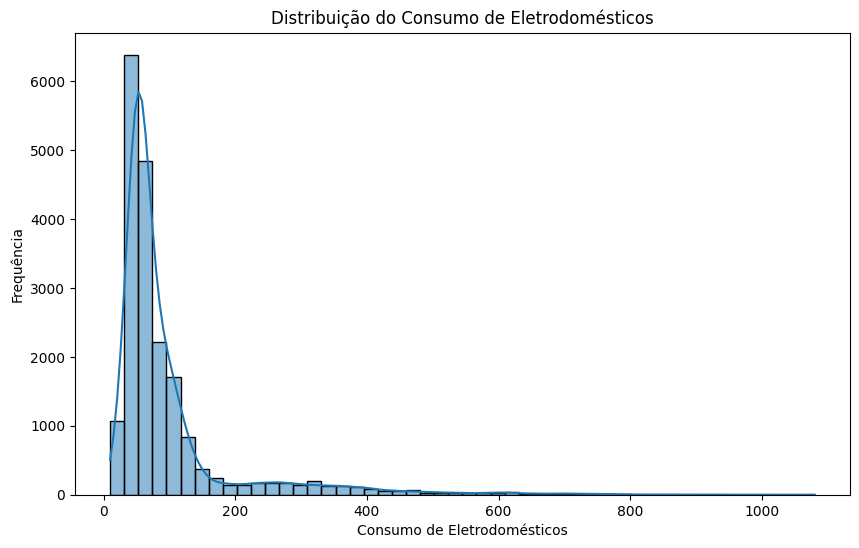

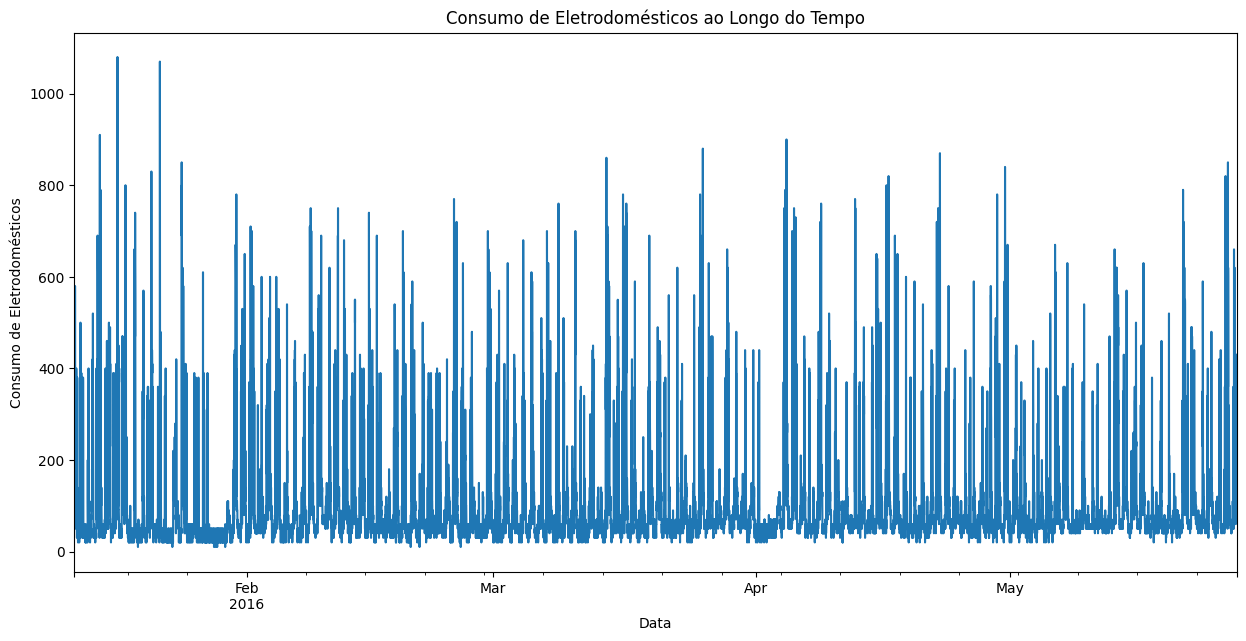

In [22]:
# Histograma dos eletrodomésticos
plt.figure(figsize=(10, 6))
sns.histplot(df['Appliances'], bins=50, kde=True)
plt.title('Distribuição do Consumo de Eletrodomésticos')
plt.xlabel('Consumo de Eletrodomésticos')
plt.ylabel('Frequência')
plt.show()

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Plotando o gráfico dos eletrodomésticos ao longo do tempo
plt.figure(figsize=(15, 7))
df['Appliances'].plot()
plt.title('Consumo de Eletrodomésticos ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Consumo de Eletrodomésticos')
plt.show()

df.reset_index(inplace=True)


Pergunta: O consumo tende a se concentrar em valores baixos ou altos?
Resposta: Com base no histograma, o consumo de eletrodomésticos tende a se concentrar em valores mais baixos. A distribuição é assimétrica à esquerda, com uma cauda longa à direita, indicando que, embora haja eventos ocasionais de alto consumo, na maioria das vezes o consumo é relativamente baixo.

Exercício 28: Correlações com variáveis ambientais

Calcule correlações entre Appliances e variáveis como temperatura e umidade.

Pergunta: quais fatores têm mais relação com o consumo?

In [27]:
# Selecionar colunas relacionadas a temperatura, umidade e Appliances
colunas_temp_umidade = [col for col in df.columns if ('T' in col or 'RH' in col) and col not in ['date']]
colunas_temp_umidade.append('Appliances')

# Calcular a matriz de correlação para as colunas selecionadas
matriz_correlacao = df[colunas_temp_umidade].corr()

# Exibir as correlações de 'Appliances' com outras variáveis
print("Correlações com Appliances:")
print(matriz_correlacao['Appliances'].sort_values(ascending=False))

Correlações com Appliances:
Appliances    1.000000
T2            0.120073
T6            0.117638
T_out         0.099155
RH_1          0.086031
T3            0.085060
T1            0.055447
T4            0.040281
T8            0.039572
RH_3          0.036292
T7            0.025801
T5            0.019760
RH_4          0.016965
Tdewpoint     0.015353
T9            0.010010
RH_5          0.006955
RH_9         -0.051462
RH_7         -0.055642
RH_2         -0.060465
RH_6         -0.083178
RH_8         -0.094039
RH_out       -0.152282
Name: Appliances, dtype: float64


Pergunta: Quais fatores têm mais relação com o consumo?
Resposta: Análise de quais fatores têm mais relação com o consumo:
Observando os valores de correlação, podemos identificar quais variáveis ambientais (temperatura e umidade) têm uma relação linear mais forte com o consumo de Appliances.
Um valor de correlação mais próximo de 1 (positivo) ou -1 (negativo) indica uma relação linear mais forte.
Variáveis com valores de correlação absoluta mais altos são aquelas que têm mais relação com o consumo.

Exercício 29: Normalização dos dados

Aplique Min-Max Scaling às variáveis numéricas.

Reutilize esses dados em modelos posteriores.

In [34]:
# Vamos assumir que as colunas 'Appliances' e 'lights' também podem ser úteis para alguns modelos
colunas_numericas = df.select_dtypes(include=np.number).columns.tolist()

# Excluir colunas que não devem ser escalonadas (como a variável target 'Appliances' e a coluna binária 'alto_consumo' se ela já existir)
colunas_para_escalar = [col for col in colunas_numericas if col not in ['Appliances', 'alto_consumo']]

# Criar uma cópia do DataFrame para armazenar os dados escalonados
df_escalado_alternativo = df.copy()

# Inicializar o MinMaxScaler
scaler = MinMaxScaler()

# Aplicar o Min-Max scaling a cada coluna individualmente usando um loop
for coluna in colunas_para_escalar:
    # Reshape a coluna para o formato que o scaler espera (array 2D)
    df_escalado_alternativo[coluna] = scaler.fit_transform(df_escalado_alternativo[[coluna]])

print("DataFrame após a aplicação do Min-Max Scaling (método alternativo):")
display(df_escalado_alternativo[colunas_para_escalar].head())

DataFrame após a aplicação do Min-Max Scaling (método alternativo):


,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.428571,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.428571,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.428571,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.571429,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.571429,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


Exercício 30: PCA

Aplique PCA e reduza para 2 componentes principais.

Plote os dados resultantes.

Pergunta: aparecem padrões ou agrupamentos naturais?

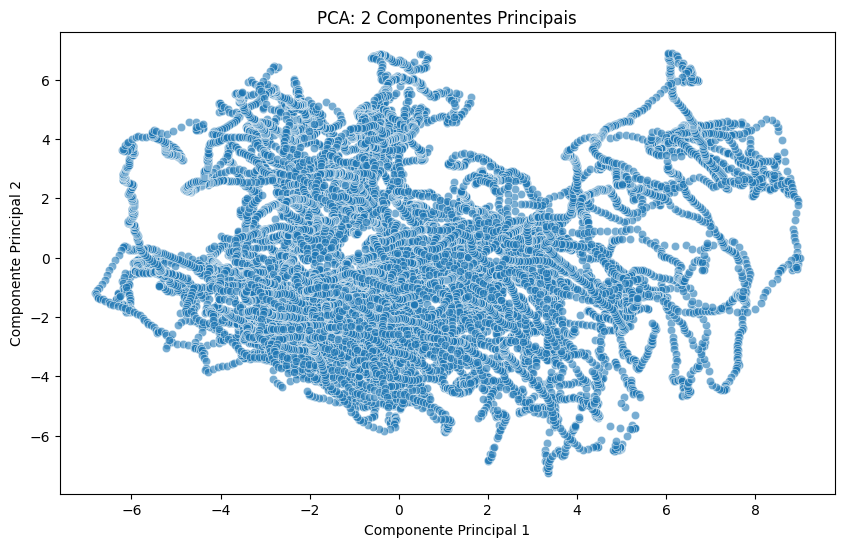

In [38]:
# Selecionar as colunas numéricas para o PCA (excluindo 'date', 'Appliances', 'lights' e 'alto_consumo' se existirem)
# Usaremos o DataFrame original aqui para garantir que todas as colunas relevantes sejam consideradas antes do escalonamento para o PCA
colunas_pca = df.select_dtypes(include=np.number).columns.tolist()
colunas_pca = [col for col in colunas_pca if col not in ['Appliances', 'lights', 'alto_consumo']]

# Lidar com possíveis valores ausentes removendo linhas com NaNs nas colunas selecionadas para o PCA
df_pronto_para_pca = df[colunas_pca].dropna()

# Padronizar os dados antes de aplicar o PCA
scaler = StandardScaler()
df_escalado_para_pca = scaler.fit_transform(df_pronto_para_pca)

# Aplicar PCA com 2 componentes
pca = PCA(n_components=2)
componentes_principais = pca.fit_transform(df_escalado_para_pca)

# Criar um novo DataFrame com os componentes principais
df_componentes_principais = pd.DataFrame(data = componentes_principais, columns = ['componente_principal_1', 'componente_principal_2'])

# Adicionar de volta o índice original ao DataFrame de componentes principais para possível mesclagem posterior
df_componentes_principais.index = df_pronto_para_pca.index

# Plotar os componentes principais
plt.figure(figsize=(10, 6))
sns.scatterplot(x='componente_principal_1', y='componente_principal_2', data=df_componentes_principais, alpha=0.6)
plt.title('PCA: 2 Componentes Principais')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

Pergunta: Aparecem padrões ou agrupamentos naturais?
Resposta: Observando o gráfico de dispersão dos dois componentes principais, não parece haver agrupamentos naturais ou padrões visuais distintos e bem definidos. Os pontos se espalham de forma relativamente contínua no espaço bidimensional reduzido pelo PCA. Isso sugere que, com base nesses dois componentes principais, não há subgrupos claramente separados nos dados.

**Exercicio 31:**
Regressão Linear Múltipla
- Modele Appliances em função das variáveis ambientais.
- Avalie R² e erro médio.

In [13]:
X = df.drop(['date', 'Appliances', 'lights'], axis=1)
y = df['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² (Coefficient of Determination): {r2:.2f}")

RMSE (Root Mean Squared Error): 92.45
R² (Coefficient of Determination): 0.15


**Exercicio 32**: Random Forest Regressor
- Treine um modelo de Random Forest para prever Appliances.
- Compare o RMSE com a regressão linear.


In [ ]:
X = df.drop(['date', 'Appliances', 'lights'], axis=1)
y = df['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"RMSE da Regressão Linear: {rmse_lr:.2f}")
print(f"R² da Regressão Linear: {r2_lr:.2f}")

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\nRMSE do Random Forest Regressor: {rmse_rf:.2f}")
print(f"R² do Random Forest Regressor: {r2_rf:.2f}")

print(f"\nComparação de RMSE:")
print(f"RMSE da Regressão Linear: {rmse_lr:.2f}")
print(f"RMSE do Random Forest Regressor: {rmse_rf:.2f}")

if rmse_rf < rmse_lr:
    print("O Random Forest Regressor tem um RMSE menor que a Regressão Linear.")
elif rmse_rf > rmse_lr:
    print("O Random Forest Regressor tem um RMSE maior que a Regressão Linear.")
else:
    print("O Random Forest Regressor e a Regressão Linear têm o mesmo RMSE.")

**Exercicio 33**: K-Means clustering
- Aplique K-Means com 3 a 5 clusters.
- Interprete os perfis de consumo

In [ ]:
df = pd.read_csv("/content/energydata_complete.csv")

X_clustering = df.drop(['date', 'Appliances', 'lights'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

inertia = []
for k in range(3, 6):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    df[f'cluster_{k}'] = kmeans.labels_
plt.figure(figsize=(8, 4))
plt.plot(range(3, 6), inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para K-Means')
plt.xticks(range(3, 6))
plt.show()

print("\nAnálise de clusters para k=3:")
print(df.groupby('cluster_3')[X_clustering.columns].mean())

print("\nAnálise de clusters para k=4:")
print(df.groupby('cluster_4')[X_clustering.columns].mean())

print("\nAnálise de clusters para k=5:")
print(df.groupby('cluster_5')[X_clustering.columns].mean())

**Exercicio 34**: Classificação binária
- Crie uma variável: alto vs baixo consumo (Appliances maior/menor que a mediana).
- Treine Logistic Regression e Random Forest Classifier.

In [ ]:
mediana_appliances = df['Appliances'].median()
df['alto_consumo'] = (df['Appliances'] > mediana_appliances).astype(int)

X_clf = df.drop(['date', 'Appliances', 'lights', 'alto_consumo'], axis=1)
y_clf = df['alto_consumo']

X_treino_clf, X_teste_clf, y_treino_clf, y_teste_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

scaler_clf = StandardScaler()
X_treino_escalado_clf = scaler_clf.fit_transform(X_treino_clf)
X_teste_escalado_clf = scaler_clf.transform(X_teste_clf)

modelo_lr_clf = LogisticRegression(max_iter=1000)
modelo_lr_clf.fit(X_treino_escalado_clf, y_treino_clf)

modelo_rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf_clf.fit(X_treino_escalado_clf, y_treino_clf)

print("Modelos treinados: Regressão Logística e Random Forest Classifier.")

**Exercicio 35**: Avaliação de classificação
- Gere matriz de confusão e métricas (accuracy, precision, recall, F1-score).
- Pergunta: o modelo erra mais para alto ou para baixo consumo?

In [ ]:
print("Avaliação do Modelo de Regressão Logística:")
y_pred_lr_clf = modelo_lr_clf.predict(X_teste_escalado_clf)

cm_lr = confusion_matrix(y_teste_clf, y_pred_lr_clf)
print("\nMatriz de Confusão (Regressão Logística):")
print(cm_lr)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Baixo Consumo', 'Alto Consumo'], yticklabels=['Baixo Consumo', 'Alto Consumo'])
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão (Regressão Logística)')
plt.show()

accuracy_lr = accuracy_score(y_teste_clf, y_pred_lr_clf)
precision_lr = precision_score(y_teste_clf, y_pred_lr_clf)
recall_lr = recall_score(y_teste_clf, y_pred_lr_clf)
f1_lr = f1_score(y_teste_clf, y_pred_lr_clf)

print(f"Acurácia (Regressão Logística): {accuracy_lr:.2f}")
print(f"Precisão (Regressão Logística): {precision_lr:.2f}")
print(f"Recall (Regressão Logística): {recall_lr:.2f}")
print(f"F1-score (Regressão Logística): {f1_lr:.2f}")


print("\n" + "="*50 + "\n")

print("Avaliação do Modelo Random Forest Classifier:")
y_pred_rf_clf = modelo_rf_clf.predict(X_teste_escalado_clf)

cm_rf = confusion_matrix(y_teste_clf, y_pred_rf_clf)
print("\nMatriz de Confusão (Random Forest Classifier):")
print(cm_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Baixo Consumo', 'Alto Consumo'], yticklabels=['Baixo Consumo', 'Alto Consumo'])
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão (Random Forest Classifier)')
plt.show()


accuracy_rf = accuracy_score(y_teste_clf, y_pred_rf_clf)
precision_rf = precision_score(y_teste_clf, y_pred_rf_clf)
recall_rf = recall_score(y_teste_clf, y_pred_rf_clf)
f1_rf = f1_score(y_teste_clf, y_pred_rf_clf)

print(f"Acurácia (Random Forest Classifier): {accuracy_rf:.2f}")
print(f"Precisão (Random Forest Classifier): {precision_rf:.2f}")
print(f"Recall (Random Forest Classifier): {recall_rf:.2f}")
print(f"F1-score (Random Forest Classifier): {f1_rf:.2f}")

print("\nAnálise de Erros:")

tn_lr, fp_lr, fn_lr, tp_lr = cm_lr.ravel()
false_positives_lr = fp_lr
false_negatives_lr = fn_lr

print("\nRegressão Logística:")
print(f"Erros em prever Alto Consumo (Falsos Positivos): {false_positives_lr}")
print(f"Erros em prever Baixo Consumo (Falsos Negativos): {false_negatives_lr}")

if false_positives_lr > false_negatives_lr:
    print("O modelo de Regressão Logística erra mais ao prever Alto Consumo (mais Falsos Positivos).")
elif false_positives_lr < false_negatives_lr:
    print("O modelo de Regressão Logística erra mais ao prever Baixo Consumo (mais Falsos Negativos).")
else:
    print("O modelo de Regressão Logística comete um número semelhante de Falsos Positivos e Falsos Negativos.")

tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()
false_positives_rf = fp_rf
false_negatives_rf = fn_rf

print("\nRandom Forest Classifier:")
print(f"Erros em prever Alto Consumo (Falsos Positivos): {false_positives_rf}")
print(f"Erros em prever Baixo Consumo (Falsos Negativos): {false_negatives_rf}")

if false_positives_rf > false_negatives_rf:
    print("O modelo Random Forest Classifier erra mais ao prever Alto Consumo (mais Falsos Positivos).")
elif false_positives_rf < false_negatives_rf:
    print("O modelo Random Forest Classifier erra mais ao prever Baixo Consumo (mais Falsos Negativos).")
else:
    print("O modelo Random Forest Classifier comete um número semelhante de Falsos Positivos e Falsos Negativos.")

**PARTE 4 – Exercícios no Orange Data Mining**

> **Observação:** Os exercícios 36 a 40 foram realizados no Orange Data Mining.  
> O arquivo nomeado como "Orange_Data_Mining_Ex36-40" com esses exercícios está disponível no repositório do Github.
link: https://github.com/LucasWerppFranco/CP-1---Energias-Renovaveis

Ex. 36 a 40:

In [ ]:
from IPython.display import Image, display
display(Image(url='https://raw.githubusercontent.com/LucasWerppFranco/CP-1---Energias-Renovaveis/main/Arquivos_adicionais/Ex36-40.png'))